# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
import pandas as pd
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1jpbyRYUQg5jrnjzRPT0Lo6mN83UxKxim"})   
downloaded.GetContentFile('archive1.zip')   

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [3]:
!unzip -q archive1.zip
df=pd.read_csv("creditcard.csv")
df.isnull().sum()

replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
import pandas as pd
import numpy as np
df=pd.read_csv("creditcard.csv")

print(df.shape)
dfX=df.iloc[:,:30]
dfY=df.iloc[:,30:31]
dfX.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
train_X,train_Y = dfX.iloc[:142403],dfY.iloc[:142403]
train_X=(train_X-train_X.mean())/train_X.std()

validate_X, validate_Y =dfX.iloc[142403:227845],dfY.iloc[142403:227845]
validate_X=(validate_X-train_X.mean())/train_X.std()

test_X, test_Y = dfX.iloc[227845:],dfY.iloc[227845:]
test_X=(test_X-train_X.mean())/train_X.std()


In [6]:
model = Sequential()
model.add(Dense(10, input_shape = (train_X.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [19]:
r=model.fit(train_X, train_Y, 
	validation_data=(validate_X, validate_Y),
	epochs=20, batch_size=100)

Epoch 1/20
1425/1425 [==============================] - 22s 15ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 361.3168 - val_accuracy: 0.9983
Epoch 2/20
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 411.1318 - val_accuracy: 0.9983
Epoch 3/20
1425/1425 [==============================] - 20s 14ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 397.2224 - val_accuracy: 0.9983
Epoch 4/20
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 389.2119 - val_accuracy: 0.9983
Epoch 5/20
1425/1425 [==============================] - 21s 14ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 420.6532 - val_accuracy: 0.9983
Epoch 6/20
1425/1425 [==============================] - 21s 14ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 412.3998 - val_accuracy: 0.9983
Epoch 7/20
1425/1425 [==============================] - 20s 14ms/step - loss: 0.0014 - accuracy: 0.9997 - val_lo

In [20]:
e= r.history
ef=pd.DataFrame(e)
ef["accuracy"].max()

0.9997050762176514

2671/2671 [==============================] - 25s 9ms/step - loss: 645.7624 - accuracy: 0.9983


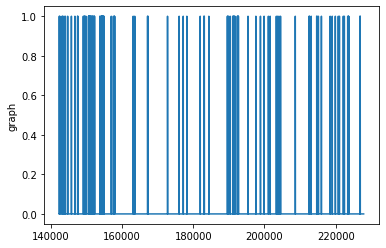

In [21]:
import matplotlib.pyplot as plt

model.evaluate(validate_X,validate_Y)
plt.plot(validate_Y)
plt.ylabel('graph')
plt.show()

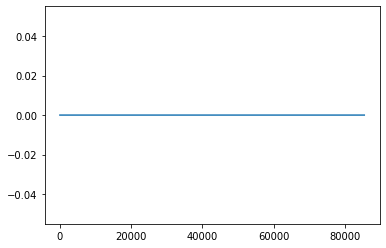

In [22]:
plt.plot(model.predict(validate_X))
plt.show()